In [3]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
from sedov import sedov_rduP

In [4]:
# sedov blast params
t = 0.8
gamma = 1.4

# set up numerical solution
N = 64
p = 3

solver = EulerSolver(
    w0=sedov(dims="x", E0=0.1, E1=1),
    bc=BoundaryCondition(x="reflective"),
    gamma=gamma,
    conservative_ic=True,
    fv_ic=True,
    nx=N,
    px=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=p > 0,
    NAD=1e-3,
    all_floors=True,
    snapshots_as_fv_averages=False,
    cupy=False,
)

# run simulation
solver.rkorder(t)

/usr/local/Caskroom/miniconda/base/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Caskroom/miniconda/base/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 0.8/0.8 [00:01]                 


chi0=0.9754065475031871


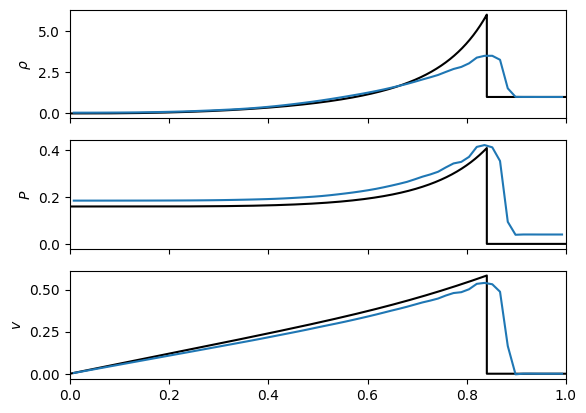

In [5]:
# find analytical solution and plot comparison

# analytical solution
r, d, u, P = sedov_rduP(t=t, dim=1, gamma=gamma)

# set up plot
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].set_ylabel(r"$\rho$")
ax[0].plot(r, d, "k")
ax[1].set_ylabel(r"$P$")
ax[1].plot(r, P, "k")
ax[2].set_ylabel(r"$v$")
ax[2].plot(r, u, "k")
ax[2].set_xlim(0, 1)

# plot numerical solution
slices = dict(y=0.5, z=0.5, t=t)
solver.plot_1d_slice(ax[0], param="rho", **slices)
solver.plot_1d_slice(ax[1], param="P", verbose=False, **slices)
solver.plot_1d_slice(ax[2], param="vx", verbose=False, **slices)